# Projeto ETL de Músicas 🎵

Este notebook realiza um processo ETL simples com um dataset de músicas, contendo título, artista, duração, gênero, ano de lançamento e visualizações no YouTube.

## Etapas:
- 🔍 Análise exploratória
- 🔄 Mini pipeline ETL
- 📊 Visualizações
- 📁 Geração de CSV limpo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Leitura do arquivo CSV
df = pd.read_csv("musicas.csv") 
df.head(10)

,titulo,artista,duracao_segundos,genero,ano_lancamento,visualizacoes_youtube
0,Lose Yourself,Eminem,326,Hip-Hop,2002,318000000
1,Call Out My Name,The Weeknd,208,R&B,2018,1000000000
2,The Feels,Labrinth,178,R&B,2022,11000000
3,Wrecked,Imagine Dragons,255,Pop Rock,2021,201000000
4,The Kill (Bury Me),Thirty Seconds To Mars,261,Rock Alternativo,2005,285000000
5,Numb,Linkin Park,185,Nu Metal,2003,2500000000
6,Nothing's Gonna Hurt You Baby,Cigarettes After Sex,267,Dream Pop,2012,42000000
7,THE LONELIEST,Måneskin,278,Rock Alternativo,2022,115000000
8,Beautiful Things,Benson Boone,222,Pop,2024,679000000
9,Rolling in the Deep,Adele,228,Pop,2010,2600000000


In [5]:
# Informações básicas
df.info()

# Estatísticas descritivas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   titulo                 25 non-null     object
 1   artista                25 non-null     object
 2   duracao_segundos       25 non-null     int64 
 3   genero                 25 non-null     object
 4   ano_lancamento         25 non-null     int64 
 5   visualizacoes_youtube  25 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.3+ KB


,duracao_segundos,ano_lancamento,visualizacoes_youtube
count,25.000000,25.000000,2.500000e+01
mean,255.000000,2006.800000,5.285920e+08
std,43.212652,11.011358,6.880796e+08
min,178.000000,1987.000000,7.000000e+06
25%,228.000000,2000.000000,1.150000e+08
50%,255.000000,2003.000000,2.850000e+08
75%,296.000000,2018.000000,6.790000e+08
max,328.000000,2024.000000,2.600000e+09


In [6]:
# Transformações - ETL

# Padronizar nomes das colunas para minúsculas e sem espaços
df.columns = [col.lower().replace(" ", "_") for col in df.columns]

# Transformar segundos em minutos e renomear a coluna
df.insert(3, 'duracao_minutos', (df['duracao_segundos'] / 60).round(2))  # Insere na 4ª posição (índice 3)
df.drop(columns=['duracao_segundos'], inplace=True)  # Remove a coluna original

# Mostrar resultado para conferir
print(df.head())

               titulo                 artista  duracao_minutos  \
0       Lose Yourself                  Eminem             5.43   
1    Call Out My Name              The Weeknd             3.47   
2           The Feels                Labrinth             2.97   
3             Wrecked         Imagine Dragons             4.25   
4  The Kill (Bury Me)  Thirty Seconds To Mars             4.35   

             genero  ano_lancamento  visualizacoes_youtube  
0           Hip-Hop            2002              318000000  
1               R&B            2018             1000000000  
2               R&B            2022               11000000  
3          Pop Rock            2021              201000000  
4  Rock Alternativo            2005              285000000  


In [7]:
# Função para formatar visualizações em M e B
def formatar_milhoes_bilhoes(x):
    if x >= 1_000_000_000:  # Bilhões
        return f"{x / 1_000_000_000:.1f}B"
    elif x >= 1_000_000:    # Milhões
        return f"{x / 1_000_000:.1f}M"
    else:
        return f"{x:,}".replace(",", ".")  # Milhares com ponto

# Aplica a função na coluna numérica original
df['visualizacoes_formatadas'] = df['visualizacoes_youtube'].apply(formatar_milhoes_bilhoes)

# Ordena o DataFrame pela coluna numérica original da maior para a menor
df_ordenado = df.sort_values(by='visualizacoes_youtube', ascending=False)

# Mostrar o DataFrame ordenado para conferência
print(df_ordenado[['titulo', 'visualizacoes_youtube', 'visualizacoes_formatadas']].head())

                 titulo  visualizacoes_youtube visualizacoes_formatadas
9   Rolling in the Deep             2600000000                     2.6B
5                  Numb             2500000000                     2.5B
14                Creep             1100000000                     1.1B
1      Call Out My Name             1000000000                     1.0B
23     Here Without You              974000000                   974.0M


C:\Users\lidis\AppData\Local\Temp\ipykernel_69440\1124796236.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='titulo', x='visualizacoes_youtube', palette='viridis')


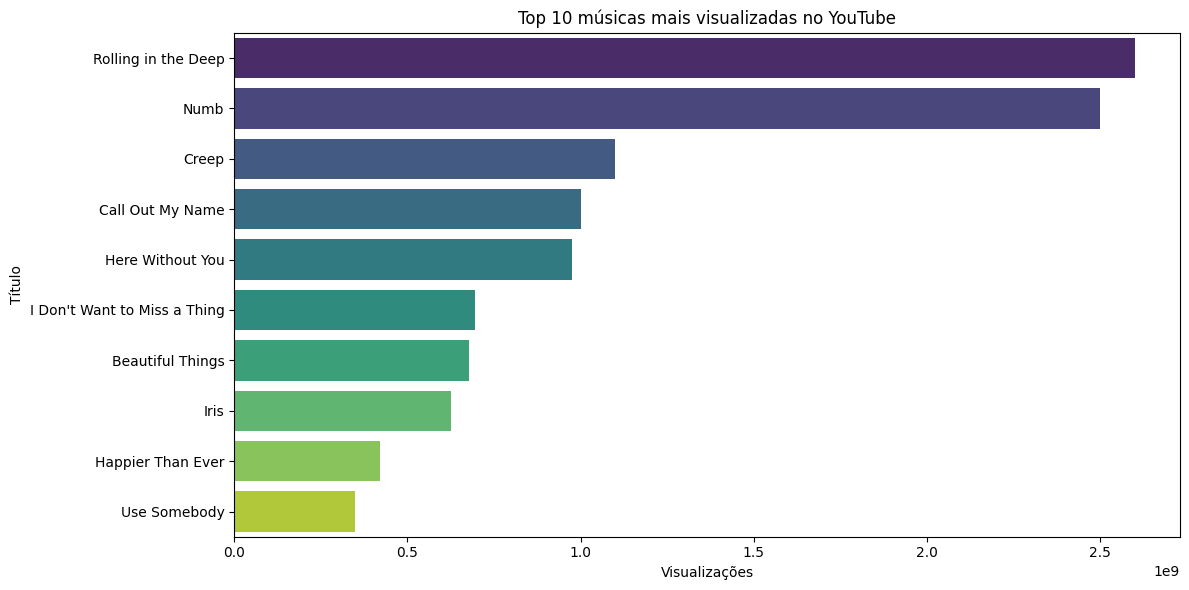

In [8]:
# Top 10 músicas mais visualizadas
top_10 = df.sort_values(by='visualizacoes_youtube', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_10, y='titulo', x='visualizacoes_youtube', palette='viridis')
plt.title("Top 10 músicas mais visualizadas no YouTube")
plt.xlabel("Visualizações")
plt.ylabel("Título")
plt.tight_layout()
plt.show()

In [9]:
# Filtro simples por gênero
genero = "Rock Alternativo"
df[df["genero"] == genero].sort_values(by="visualizacoes_youtube", ascending=False)

,titulo,artista,duracao_minutos,genero,ano_lancamento,visualizacoes_youtube,visualizacoes_formatadas
14,Creep,Radiohead,3.97,Rock Alternativo,1992,1100000000,1.1B
11,Iris,Goo Goo Dolls,5.08,Rock Alternativo,1998,627000000,627.0M
13,Use Somebody,Kings Of Leon,3.90,Rock Alternativo,2008,349000000,349.0M
4,The Kill (Bury Me),Thirty Seconds To Mars,4.35,Rock Alternativo,2005,285000000,285.0M
12,With Arms Wide Open,Creed,4.23,Rock Alternativo,2000,196000000,196.0M
7,THE LONELIEST,Måneskin,4.63,Rock Alternativo,2022,115000000,115.0M
15,Dare You To Move,Switchfoot,3.28,Rock Alternativo,2003,39000000,39.0M


In [10]:
# Distribuição por ano de lançamento
df['ano_lancamento'].value_counts().sort_index()


ano_lancamento
1987    1
1988    1
1992    1
1998    2
2000    2
2002    2
2003    4
2005    2
2008    1
2010    1
2012    1
2018    1
2021    2
2022    2
2023    1
2024    1
Name: count, dtype: int64

In [11]:
# Contagem de músicas por gênero
df['genero'].value_counts()


genero
Rock Alternativo    7
Pop Rock            3
Rock                3
Pop                 3
R&B                 2
Hip-Hop             1
Dream Pop           1
Nu Metal            1
Britpop             1
Soul/Pop            1
Indie Pop           1
Hard Rock           1
Name: count, dtype: int64

In [13]:
# Salvar CSV tratado
df_ordenado.to_csv("musicas_tratadas.csv", index=False)